<a href="https://colab.research.google.com/github/Debmalya-prog/object_classification/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

from keras.datasets import cifar10
from keras import models

from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,GlobalAveragePooling2D

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
X_train = x_train/255
X_test = x_test/255

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170508288/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


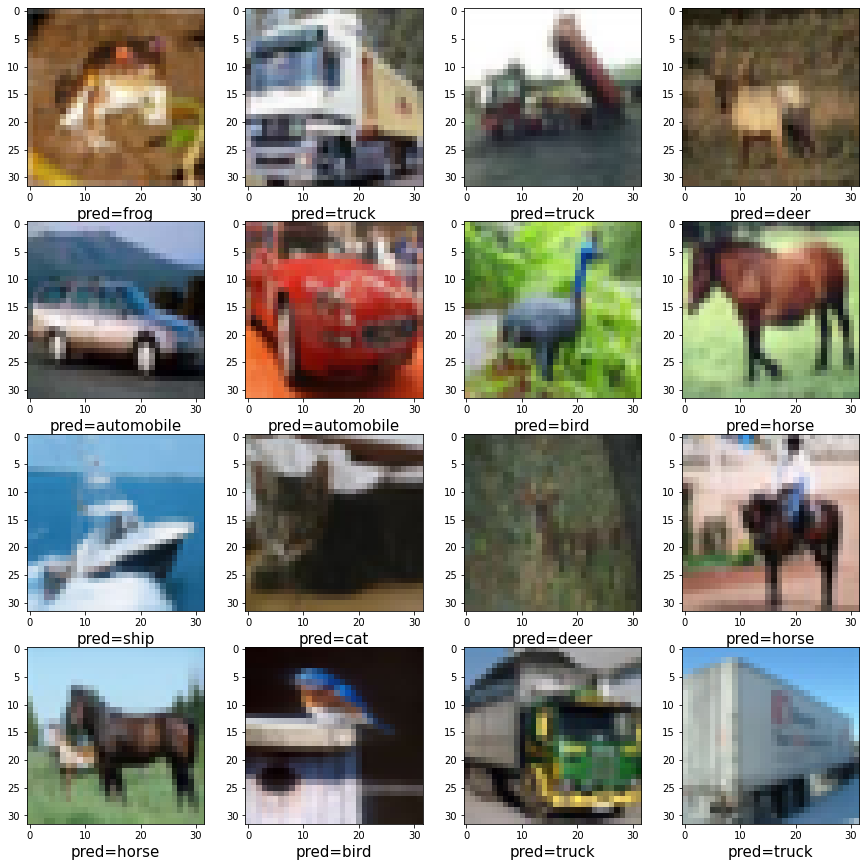

In [ ]:
image_dict = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

plt.figure(figsize=(15,15))
for i in range(16):
    plt.subplot(4,4, i+1)
    plt.imshow(x_train[i].astype(int))
    plt.xlabel('pred={}'.format(image_dict[y_train[i].item()]), fontsize=15)
plt.show()

BUILDING THE CNN MODEL


In [ ]:

model = Sequential()

model.add(Conv2D(64,3,3,padding = 'same', activation ='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(128,3,3,padding = 'same', activation ='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))

model.add(keras.layers.Dense(10))

model.add(keras.layers.Activation('softmax'))

model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 11, 11, 64)        1792      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 2, 2, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 1, 1, 128)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [ ]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
result = model.fit(x_train, y_train, batch_size=32, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 17s 10ms/step - loss: 1.7549 - accuracy: 0.4023
Epoch 2/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4111 - accuracy: 0.4972
Epoch 3/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.3219 - accuracy: 0.5300
Epoch 4/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2487 - accuracy: 0.5593
Epoch 5/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1964 - accuracy: 0.5779
Epoch 6/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1407 - accuracy: 0.5947
Epoch 7/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0910 - accuracy: 0.6139
Epoch 8/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0624 - accuracy: 0.6256
Epoch 9/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0237 - accuracy: 0.6381
Epoch 10/50
1563/1563 [==============================] - 16s 10m

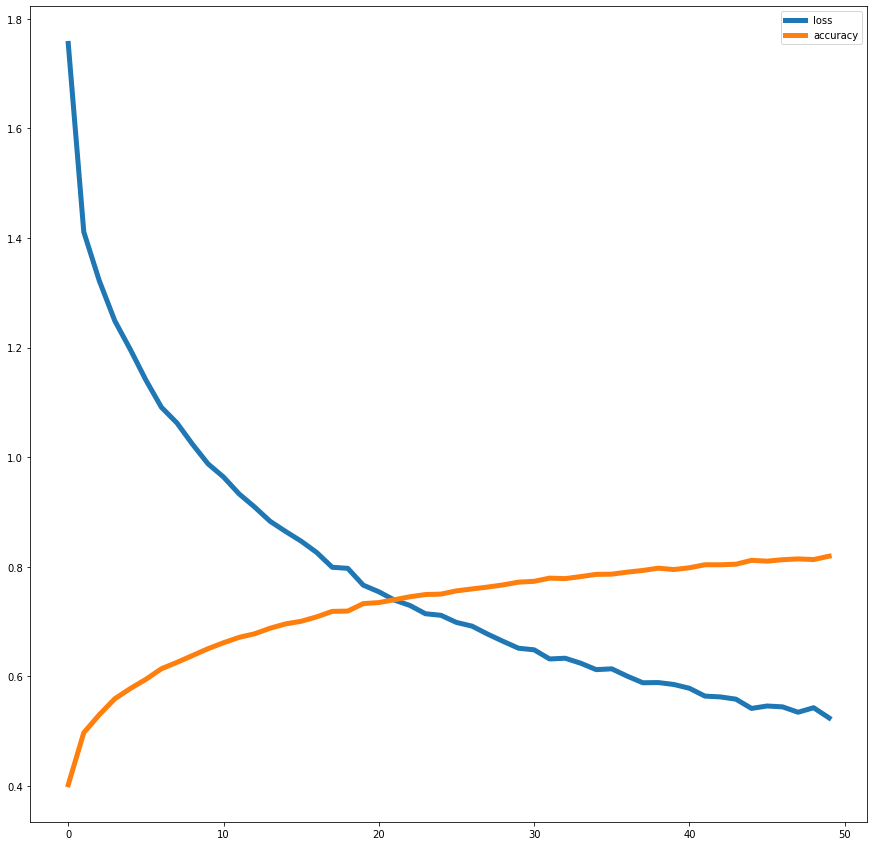

In [ ]:

plt.figure(figsize=(15,15))
result_df = pd.DataFrame(result.history)
plt.plot(result_df, linewidth=5)
plt.legend(result_df.columns.to_list())
plt.show()

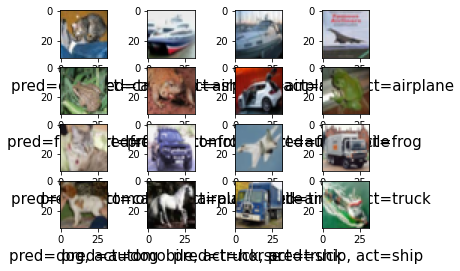

In [ ]:
y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis = -1)
for i in range(16):
  plt.subplot(4,4, i+1)
  plt.imshow(x_test[i].astype(int))
  plt.xlabel('pred={}, act={}'.format(image_dict[y_pred[i].item()], image_dict[y_test[i].item()]), fontsize=15)
plt.show()